# Hand-written digits recognition

In [ ]:
%matplotlib inline

from keras import backend as K
from keras.layers import Dense
from keras.models import Model, Sequential
from keras.utils import to_categorical

from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

In [ ]:
# Set bigger figures
plt.rcParams["figure.figsize"] = (15, 15)

## Digits dataset

This dataset is made up of 1797 8x8 images. Each image is a hand-written digit. In order to utilize an 8x8 figure like this, we had to first transform it into a feature vector of length 64.

## Train/Test division

Dataset is divided into train and test sets. Test set is used to evaluate overall performance of model after training. Data is split in a **stratified fashion**, using class labels as distribution.

## One-hot vector

Targets are transformed to one-hot vectors. One-hot vector is a vector with all '0' but one '1' at unique for each label index.

![one-hot vectors](refs/one-hot_vectors.jpg)

In [ ]:
# Prepare data
digits = datasets.load_digits()

data_train, data_test, target_train, target_test = \
  train_test_split(digits.data, digits.target, test_size=0.2, random_state=7, stratify=digits.target)
_, n_features = digits.data.shape

# Prepare targets
# YOUR CODE HERE:
onehot_train = to_categorical( ... )
onehot_test = to_categorical( ... )

## Data inspection

It is always worth to look at your date to understand it. Below we show 20 digits from our train set.

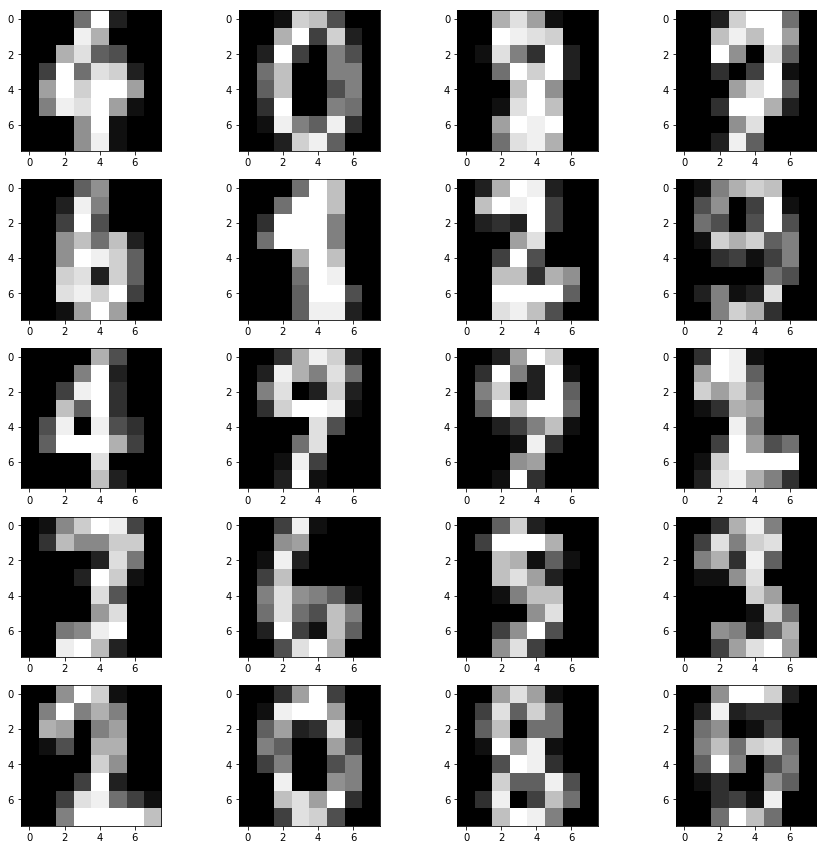

In [4]:
# Visualize data
IMAGE_SHAPE = (8, 8)
for i, image in enumerate(data_train[:20, :]):
    plt.subplot(5, 4, i + 1)
    plt.imshow(image.reshape(IMAGE_SHAPE), cmap=plt.cm.gray)
plt.show()

### Visualization in low-dimensional representation

> t-Distributed Stochastic Neighbor Embedding (t-SNE) is a (prize-winning) technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

From: http://lvdmaaten.github.io/tsne/

#### You can see that:
* 3-s and 9-s are pretty similar,
* some 5-s look like 9-s,
* some 8-s look like 1-s,
* some 9-s look like 8-s,
* 6-s, 4-s, 0-s are easily distinguishable.

In [ ]:
# Fit t-SNE 3D transformation on digits dataset
tsne = TSNE(n_components=3, random_state=7)
X_reduced = tsne.fit_transform(digits.data)
y = digits.target

# Fit t-SNE 2D transformation on digits dataset
tsne_2D = TSNE(n_components=2, random_state=7)
X_reduced_2D = tsne_2D.fit_transform(digits.data)

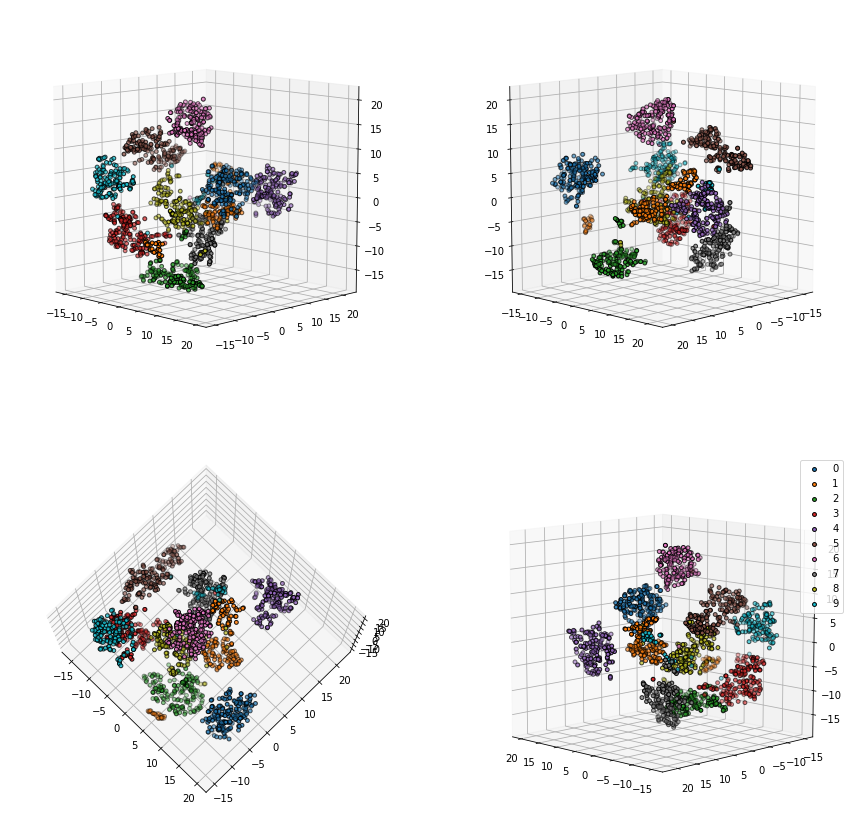

In [12]:
# Create 3D figure
fig = plt.figure(figsize=plt.figaspect(1.0))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax1.view_init(10, -45)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.view_init(10, 45)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.view_init(80, -45)
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.view_init(10, 135)

# Scatter results
for i in range(len(digits.target_names)):
    ax1.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2],
                cmap=plt.cm.Set1, edgecolor='k', s=15, label=i)
    ax2.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2],
                cmap=plt.cm.Set1, edgecolor='k', s=15, label=i)
    ax3.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2],
                cmap=plt.cm.Set1, edgecolor='k', s=15, label=i)
    ax4.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2],
                cmap=plt.cm.Set1, edgecolor='k', s=15, label=i)

plt.legend()
plt.show()

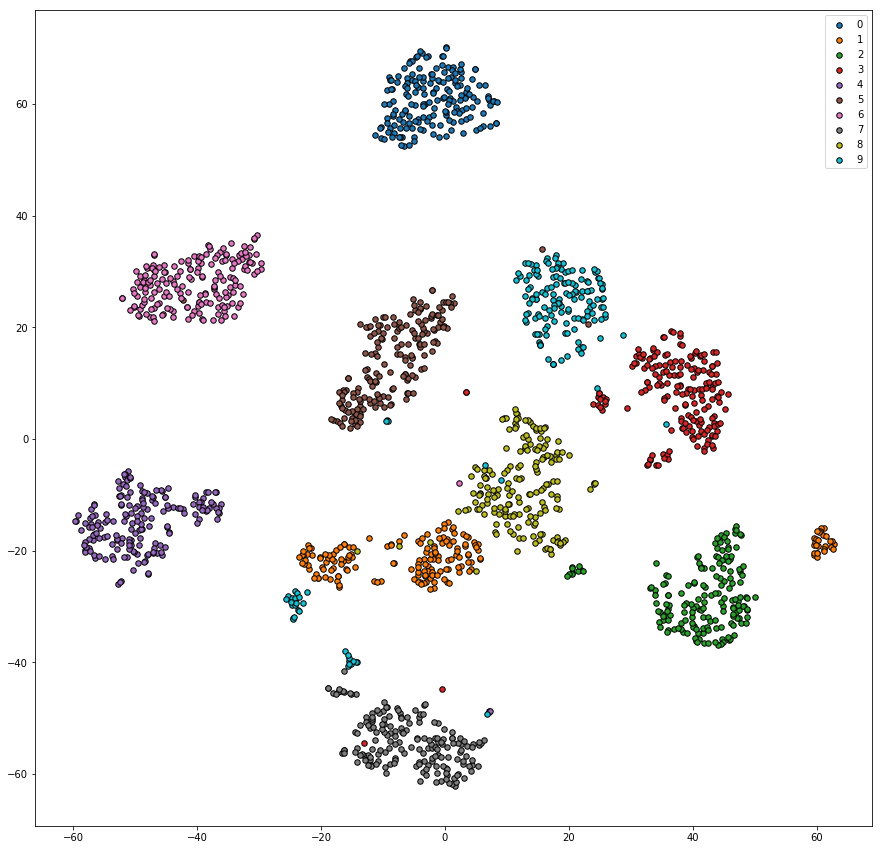

In [6]:
plt.figure()
for i in range(len(digits.target_names)):
    plt.scatter(X_reduced_2D[y == i, 0], X_reduced_2D[y == i, 1],
                cmap=plt.cm.Set1, edgecolor='k', s=30, label=i)
plt.legend()
plt.show()

### Dense

![fully connected](refs/fully_connected_layer.png)

In dense layer (fully connected) **each neuron is connected to every neuron in previous layer**. For every connection there is one corresponding weight. To calculate neuron value we multiply inputs with corresponding weights and sum them together: $z_j = \sum_i x_i * w_{ji}$, and then we apply activation function $a_j = g(z_j)$. Activation function adds non-linearity to out computation, which allows us to model complex relations.

In [11]:
help(Dense)

Help on class Dense in module keras.layers.core:

class Dense(keras.engine.topology.Layer)
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: if the input to the layer has a rank greater than 2, then
 |  it is flattened prior to the initial dot product with `kernel`.
 |  
 |  # Example
 |  
 |  ```python
 |      # as first layer in a sequential model:
 |      model = Sequential()
 |      model.add(Dense(32, input_shape=(16,)))
 |      # now the model will take as input arrays of shape (*, 16)
 |      # and output arrays of shape (*, 32)
 |  
 |      # after the first layer, you don't need to specify
 |      # the size of the in

In [9]:
# Build model
# YOUR CODE HERE:
model = Sequential()
model.add(Dense( ... ))
model.add(Dense( ... ))

## Loss function

We need to measure how bad we are to get better. For classification problem we often interpret neural network output as unnormalized log probability of each class. We calculate probabilities with softmax function:

![softmax](refs/softmax.svg)

Then we use cross-entropy, to calculate how two distributions (predictions and targets) differ:

![cross entropy](refs/cross_entropy.svg)

**NOTE:** The cross-entropy objective wants the predicted distribution to have all of its mass on the correct answer. $H(p,q) = H(p) + D_KL(p||q), H(p) = 0$.

## Gradient decent

When we know what is net loss, we now want to change each parameter in such a way, that will decrease its error. What tells us how to change parameters is gradient. As we change our parameters in the opposite direction to the gradient, we decrease loss. This algorithm is called gradient decent and it's very similar to blindly wandering in the mountains, searching for valley.

![gradient decent](refs/grad_descent_mountain.png)

## Optimizer

Computing gradient is not enough, we need to apply it somewhat. There are different ways to do this, one of them is momentum which we use.

### Learning rate

Learning rate tells us how big update should be: $w = w - \alpha * grad$.

![learning rate](refs/learning_rate.png)

**NOTE:** Describe pictures.

### Momentum

Momentum simulates inertia of update: $v = \mu * v' - \alpha * grad, w = w + v$. With Momentum update, the parameter vector will build up velocity in any direction that has consistent gradient.

### Decay

In training deep networks, it is usually helpful to anneal the learning rate over time. Good intuition to have in mind is that with a high learning rate, the system contains too much kinetic energy and the parameter vector bounces around chaotically, unable to settle down into deeper, but narrower parts of the loss function.

* Step decay: Reduce the learning rate by some factor every few epochs. Typical values might be reducing the learning rate by a half every 5 epochs, or by 0.1 every 20 epochs. These numbers depend heavily on the type of problem and the model. One heuristic you may see in practice is to watch the validation error while training with a fixed learning rate, and reduce the learning rate by a constant (e.g. 0.5) whenever the validation error stops improving.
* Exponential decay: It has the mathematical form $\alpha = \alpha_0e^{-kt}$, where $a_0, k$ are hyperparameters and $t$ is the iteration number (but you can also use units of epochs).
* $1/t$ decay has the mathematical form $\alpha = \alpha_0/(1+kt)$ where $a_0, k$ are hyperparameters and $t$ is the iteration number.

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

## Training

Use `model.fit(...)` method to train model for 25 epochs at max. Use validation split of 0.1.

In [10]:
help(model.fit)

Help on method fit in module keras.models:

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, **kwargs) method of keras.models.Sequential instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    # Arguments
        x: Numpy array of training data.
            If the input layer in the model is named, you can also pass a
            dictionary mapping the input name to a Numpy array.
            `x` can be `None` (default) if feeding from
            framework-native tensors (e.g. TensorFlow data tensors).
        y: Numpy array of target (label) data.
            If the output layer in the model is named, you can also pass a
            dictionary mapping the output name to a Numpy array.
            `y` can be `None` (default) if feeding from
            framework-nat

In [ ]:
# YOUR CODE HERE:
model.fit( ... )

## Evaluate model

Use `model.evaluate(...)` method to evaluate model and print it's accuracy on test set.

In [12]:
help(model.evaluate)

Help on method evaluate in module keras.models:

evaluate(x=None, y=None, batch_size=None, verbose=1, sample_weight=None, steps=None) method of keras.models.Sequential instance
    Computes the loss on some input data, batch by batch.
    
    # Arguments
        x: input data, as a Numpy array or list of Numpy arrays
            (if the model has multiple inputs).
            `x` can be `None` (default) if feeding from
            framework-native tensors (e.g. TensorFlow data tensors).
        y: labels, as a Numpy array.
            `y` can be `None` (default) if feeding from
            framework-native tensors (e.g. TensorFlow data tensors).
        batch_size: Integer. If unspecified, it will default to 32.
        verbose: verbosity mode, 0 or 1.
        sample_weight: sample weights, as a Numpy array.
        steps: Integer or `None`.
            Total number of steps (batches of samples)
            before declaring the evaluation round finished.
            Ignored with the d

In [ ]:
# Evaluate model
# YOUR CODE HERE:
results = model.evaluate( ... )
print("\n[!] Evaluation results:")
print("{0}: {2:.3f}, {1}: {3:.3f}".format(*model.metrics_names, *results))

## Visualize layers features

We use t-SNE to visualize processed digits after first (hidden) and last (output) neural net layer.

Further reading: https://distill.pub/2017/feature-visualization/

In [ ]:
### Layers outputs ###

# Get first (hidden) layer activations for every digit
intermediate_model = Model(inputs=model.input, outputs=model.layers[0].output)
activations = intermediate_model.predict(digits.data)

# Get second (output) layer activations for every digit
intermediate_model = Model(inputs=model.input, outputs=model.layers[1].output)
outputs = intermediate_model.predict(digits.data)

### 3D ###

# Fit t-SNE 2D transformation on digits embeddings
A_reduced = tsne.fit_transform(activations)

# Fit t-SNE 2D transformation on digits embeddings
O_reduced = tsne.fit_transform(outputs)

### 2D ###

# Fit t-SNE 2D transformation on digits embeddings
A_reduced_2D = tsne_2D.fit_transform(activations)

# Fit t-SNE 2D transformation on digits embeddings
O_reduced_2D = tsne_2D.fit_transform(outputs)

### 3D

In [ ]:
# Create 3D figure
fig = plt.figure(figsize=plt.figaspect(1.0))

ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')

# Scatter results
for i in range(len(digits.target_names)):
    ax1.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2],
                cmap=plt.cm.Set1, edgecolor='k', s=15, label=i)
    ax2.scatter(A_reduced[y == i, 0], A_reduced[y == i, 1], A_reduced[y == i, 2],
                cmap=plt.cm.Set1, edgecolor='k', s=15, label=i)
    ax3.scatter(O_reduced[y == i, 0], O_reduced[y == i, 1], O_reduced[y == i, 2],
                cmap=plt.cm.Set1, edgecolor='k', s=15, label=i)

plt.legend()
plt.show()

### 2D

In [ ]:
fig = plt.figure(figsize=plt.figaspect(1.0))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

for i in range(len(digits.target_names)):
    ax1.set_title("Original")
    ax1.scatter(X_reduced_2D[y == i, 0], X_reduced_2D[y == i, 1],
                cmap=plt.cm.Set1, edgecolor='k', s=30, label=i)
    ax2.set_title("Hidden layer")
    ax2.scatter(A_reduced_2D[y == i, 0], A_reduced_2D[y == i, 1],
                cmap=plt.cm.Set1, edgecolor='k', s=30, label=i)
    ax3.set_title("Output layer")
    ax3.scatter(O_reduced_2D[y == i, 0], O_reduced_2D[y == i, 1],
                cmap=plt.cm.Set1, edgecolor='k', s=30, label=i)
    
plt.legend()
plt.show()